# create figures for med4 DE Axenic 

In [37]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

In [79]:
library(ggrastr)

Warning message:
"package 'ggrastr' was built under R version 4.2.3"


In [38]:
library(ggrepel)

In [39]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [40]:
df_all_orig = read_csv(file.path('DE_results', 'MED4_all_FC_results.csv'))



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)"
Rows: 53457 Columns: 33
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (22): contrast, protein_id, Assay, contrast1, Name, gene, locus_tag, old...
dbl  (7): logFC, AveExpr, pvalue, padj, start, end, gene_length
lgl  (4): Note, exception, down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [41]:
# fill in N/A
df_all_orig = df_all_orig %>% mutate(Membrane.transport = replace_na(Membrane.transport, ""))

In [42]:
df_all_orig %>% count(contrast1)

contrast1,n
<chr>,<int>
C1vsP1_rna,1855
C2vsC1_prot,1424
C2vsC1_rna,1855
C3vsC1_prot,1424
C3vsC1_rna,1855
C3vsC2_prot,1424
C3vsC2_rna,1855
C4vsC1_prot,1424
C4vsC1_rna,1855


In [43]:
df_all = df_all_orig %>%
    filter(contrast1 %in% c('P2vsP1_prot', 'P2vsP1_rna'))

In [44]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [45]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [46]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,804
Uncharacterized,597
Genetic Info,545
Metabolism,355
AA/Nucleotide,320
Energy/Carbohydrate/Glycan,189
Membrane transport,161
Photosynthesis/Carbon fixation,134
AA/Nucleotide;Energy/Carbohydrate/Glycan,72


In [47]:
unique(df_all$contrast1)

[1] "P2vsP1_prot" "P2vsP1_rna"

In [48]:
t(head(df_all))

contrast,P2 - P1,P2 - P1,P2 - P1,P2 - P1,P2 - P1,P2 - P1
protein_id,WP_011132307.1,WP_225866782.1,WP_071812982.1,WP_011132310.1,WP_011132179.1,WP_011132114.1
logFC,-3.181408,2.092055,-4.850771,-3.239873,-3.810674,-2.550317
AveExpr,1.950864,3.111139,2.015664,2.727578,1.984790,2.136807
pvalue,1.754211e-09,4.466944e-09,6.454797e-09,8.638927e-09,2.335060e-08,3.929054e-08
padj,2.497996e-06,3.063877e-06,3.063877e-06,3.075458e-06,6.650251e-06,9.324955e-06
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot
Name,TX50_RS03580,TX50_RS01970,TX50_RS02240,ispG,TX50_RS02910,TX50_RS02580
gene,(phnD),NA,NA,ispG,(chlB),NA
locus_tag,TX50_RS03580,TX50_RS01970,TX50_RS02240,TX50_RS03595,TX50_RS02910,TX50_RS02580


In [49]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,97
Proteome,TRUE,149
RNA,FALSE,553
RNA,TRUE,574


# Top up and down regulated genes

In [50]:
df_all %>%
    filter(padj < 0.05, Category=='Metabolism') %>% top_n(-20, logFC) %>% 
    select(Assay,logFC,gene, product, Category, path) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,path
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Proteome,-3.239873,ispG,(E)-4-hydroxy-3-methylbut-2-enyl-diphosphate synthase,Metabolism,00900 Terpenoid backbone biosynthesis [PATH:ko00900]
Proteome,-3.810674,(chlB),ferredoxin:protochlorophyllide reductase (ATP-dependent) subunit B,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]
Proteome,-3.162316,bioB,biotin synthase BioB,Metabolism,00780 Biotin metabolism [PATH:ko00780]
Proteome,-2.608668,"(chlH,bchH)",magnesium chelatase subunit H,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]
RNA,-3.015567,bcp,thioredoxin-dependent thiol peroxidase,Metabolism,99980 Enzymes with EC numbers
RNA,-2.542559,fabD,ACP S-malonyltransferase,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00333 Prodigiosin biosynthesis [PATH:ko00333];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.713881,chlG,chlorophyll synthase ChlG,Metabolism,00860 Porphyrin metabolism [PATH:ko00860];01006 Prenyltransferases [BR:ko01006]
RNA,-5.374876,fabG,3-oxoacyl-[acyl-carrier-protein] reductase,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00333 Prodigiosin biosynthesis [PATH:ko00333];00780 Biotin metabolism [PATH:ko00780];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.466551,bchL,ferredoxin:protochlorophyllide reductase (ATP-dependent) iron-sulfur ATP-binding protein,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]


In [51]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [52]:
dput(names(df_all))

c("contrast", "protein_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Name", "gene", "locus_tag", "old_locus_tag", 
"source", "start", "end", "strand", "Note", "exception", "inference", 
"product", "gene_length", "path_id", "main", "sub", "path", "ecpath", 
"Category", "Membrane.transport", "kegg_gene1", "kegg_gene2", 
"gene_id", "down", "up")


In [53]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [54]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [55]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS07555,NA,high light inducible protein,NA,NA,NA,NA,9.582754,1.692376e-25
TX50_RS09275,NA,high light inducible protein,NA,NA,NA,NA,7.724628,6.064172e-27
TX50_RS01930,NA,hypothetical protein,NA,NA,NA,NA,6.716442,4.883855e-09
TX50_RS01990,(tatA),TatA/E family twin arginine-targeting protein translocase,"09123 Folding, sorting and degradation;09131 Membrane transport;09183 Protein families: signaling and cellular processes",02044 Secretion system [BR:ko02044];03060 Protein export [PATH:ko03060];03070 Bacterial secretion system [PATH:ko03070],NA,NA,6.418917,1.423354e-05
TX50_RS01780,(manB),hypothetical protein,09101 Carbohydrate metabolism;09107 Glycan biosynthesis and metabolism,00051 Fructose and mannose metabolism [PATH:ko00051];00520 Amino sugar and nucleotide sugar metabolism [PATH:ko00520];00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541],NA,NA,6.278731,1.867978e-08
TX50_RS05100,NA,DUF1830 domain-containing protein,NA,NA,2.506502,8.161950e-05,5.739883,1.517956e-06
TX50_RS06110,NA,high light inducible protein,NA,NA,3.578723,9.485699e-05,5.227949,1.053895e-20
TX50_RS05595,NA,hypothetical protein,NA,NA,3.756483,4.454277e-04,4.367388,5.521605e-06
TX50_RS04910,glnA,type I glutamate--ammonia ligase,09101 Carbohydrate metabolism;09102 Energy metabolism;09105 Amino acid metabolism;09132 Signal transduction;09143 Cell growth and death;09183 Protein families: signaling and cellular processes,"00220 Arginine biosynthesis [PATH:ko00220];00250 Alanine, aspartate and glutamate metabolism [PATH:ko00250];00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630];00910 Nitrogen metabolism [PATH:ko00910];02020 Two-component system [PATH:ko02020];04147 Exosome [BR:ko04147];04217 Necroptosis [PATH:ko04217]",2.120484,8.884468e-05,3.356977,7.395966e-06


In [56]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS09815,NA,hypothetical protein,NA,NA,-1.6483558,9.617590e-03,-7.318974,4.369788e-29
TX50_RS07370,NA,hypothetical protein,NA,NA,NA,NA,-6.624597,6.691965e-06
TX50_RS09750,NA,hypothetical protein,NA,NA,NA,NA,-6.546076,7.442791e-09
TX50_RS01170,sat,sulfate adenylyltransferase,09102 Energy metabolism;09104 Nucleotide metabolism;09106 Metabolism of other amino acids;09110 Biosynthesis of other secondary metabolites,00230 Purine metabolism [PATH:ko00230];00261 Monobactam biosynthesis [PATH:ko00261];00450 Selenocompound metabolism [PATH:ko00450];00920 Sulfur metabolism [PATH:ko00920],-0.3768282,2.323220e-01,-6.411948,4.894692e-29
TX50_RS02515,psaJ,photosystem I reaction center subunit IX,09102 Energy metabolism;09181 Protein families: metabolism,00194 Photosynthesis proteins [BR:ko00194];00195 Photosynthesis [PATH:ko00195],1.4614388,6.179798e-02,-6.036345,5.749359e-21
TX50_RS02910,(chlB),ferredoxin:protochlorophyllide reductase (ATP-dependent) subunit B,09108 Metabolism of cofactors and vitamins,00860 Porphyrin metabolism [PATH:ko00860],-3.8106737,6.650251e-06,-3.587949,6.113291e-14
TX50_RS09615,NA,hypothetical protein,NA,NA,-3.4346310,1.341340e-04,-3.184830,9.271594e-13
TX50_RS08820,NA,DUF561 domain-containing protein,NA,NA,-3.8517803,8.161950e-05,-2.886786,1.322310e-10
TX50_RS02240,NA,DUF4278 domain-containing protein,NA,NA,-4.8507713,3.063877e-06,0.121172,8.205385e-01


# Vulcano plot

In [57]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [58]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [59]:
df_degenes2 %>% count(Assay, Category) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )

Category,Proteome,RNA
<chr>,<int>,<int>
Other,9,78
Metabolism,5,28
Uncharacterized,4,115
Genetic Info,3,61
Energy/Carbohydrate/Glycan,3,18
Nitrogen metabolism,2,5
Membrane transport,1,11
high light inducible,1,8
Photosynthesis/Carbon fixation,NA,46


In [60]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"
Warning message in cbind(parts$left, chars$ellip_h, parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"


contrast,protein_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Name,gene,⋯,sub,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2,gene_id,down,up
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>


In [61]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [62]:
category_move_to_other = c('Env. Info/Cellular Process')
category_move_to_metabolism = c('Energy/Carbohydrate/Glycan')
category_move_to_aa = c('AA/Nucleotide;Energy/Carbohydrate/Glycan')
df_all = df_all %>%
    mutate(Category2 = Category) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_other, 'Other', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_metabolism, 'Metabolism', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_aa, 'AA/Nucleotide', Category2)) 

In [63]:
df_all %>% count(Assay, Category2) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )


Category2,Proteome,RNA
<chr>,<int>,<int>
Other,386,489
Metabolism,264,280
Genetic Info,258,287
AA/Nucleotide,195,197
Uncharacterized,175,422
Membrane transport,72,89
Photosynthesis/Carbon fixation,62,72
high light inducible,6,13
Nitrogen metabolism,6,6


In [64]:
df_degenes%>% count(gene) %>% arrange()

gene,n
<chr>,<int>
(acpT),1
(adk),1
"(afuA,fbpA)",1
"(afuB,fbpB)",1
(apt),1
(argG),1
(aroE),1
"(aroF,aroG,aroH)",2
"(aroK,aroL)",1


In [65]:
names(df_all)

[1] "contrast"           "protein_id"         "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Name"              
[10] "gene"               "locus_tag"          "old_locus_tag"     
[13] "source"             "start"              "end"               
[16] "strand"             "Note"               "exception"         
[19] "inference"          "product"            "gene_length"       
[22] "path_id"            "main"               "sub"               
[25] "path"               "ecpath"             "Category"          
[28] "Membrane.transport" "kegg_gene1"         "kegg_gene2"        
[31] "gene_id"            "down"               "up"                
[34] "Category2"

In [66]:
df_all$log.padj = -log10(df_all$padj)

In [67]:
dput(unique(df_all$Category2))

c("Membrane transport", "Nitrogen metabolism", "Other", "Metabolism", 
"Uncharacterized", "Genetic Info", "high light inducible", "Photosynthesis/Carbon fixation", 
"AA/Nucleotide")


In [68]:
cat_order = c(
    "Nitrogen metabolism", 
    "Photosynthesis/Carbon fixation", 
    'Genetic Info',
    "AA/Nucleotide", 
    "Membrane transport", 
    "Uncharacterized", 
    "high light inducible",
    "Metabolism", 
    "Other"
)


my.cols <- c(
  "Nitrogen metabolism" = "#1b9e77",         # Teal green
  "Photosynthesis/Carbon fixation" = "#66a61e",            # Olive green
  "AA/Nucleotide" = "#7570b3",              # Purple
  "Membrane transport" = "#e7298a",         # Pink
  "Uncharacterized" = "#d95f02",  # Orange
  "high light inducible" = "#e6ab02",       # Mustard yellow
  'Genetic Info' = "#1f78b4",  # Deep blue
  #"Metabolism" = "#c0c0c0",                 # Brown
  "Metabolism" = "#a6761d",                 # Brown
  "Other" = "#b0b0b0"                       # Gray
)

df_all$Category2 = factor(df_all$Category2, levels = cat_order)

#my.cols <- c(brewer.pal(length(unique(df_all$Category2))-1, "Set3"), 'grey34')

In [69]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [70]:
colSums(is.na(df_all))

contrast         protein_id              logFC            AveExpr 
                 0                  3                  0                  0 
            pvalue               padj              Assay          contrast1 
                 4                  4                  0                  0 
              Name               gene          locus_tag      old_locus_tag 
                 3               1638               1855                 15 
            source              start                end             strand 
                 3                  3                  3                  3 
              Note          exception          inference            product 
              3279               3279                  3                  3 
       gene_length            path_id               main                sub 
                 3               1353               1353               1353 
              path             ecpath           Category Membrane.transport 
              1353               1353                  0                  0 
        kegg_gene1         kegg_gene2            gene_id               down 
              1353               1544                  0                  0 
                up          Category2           log.padj 
                 4                  0                  4

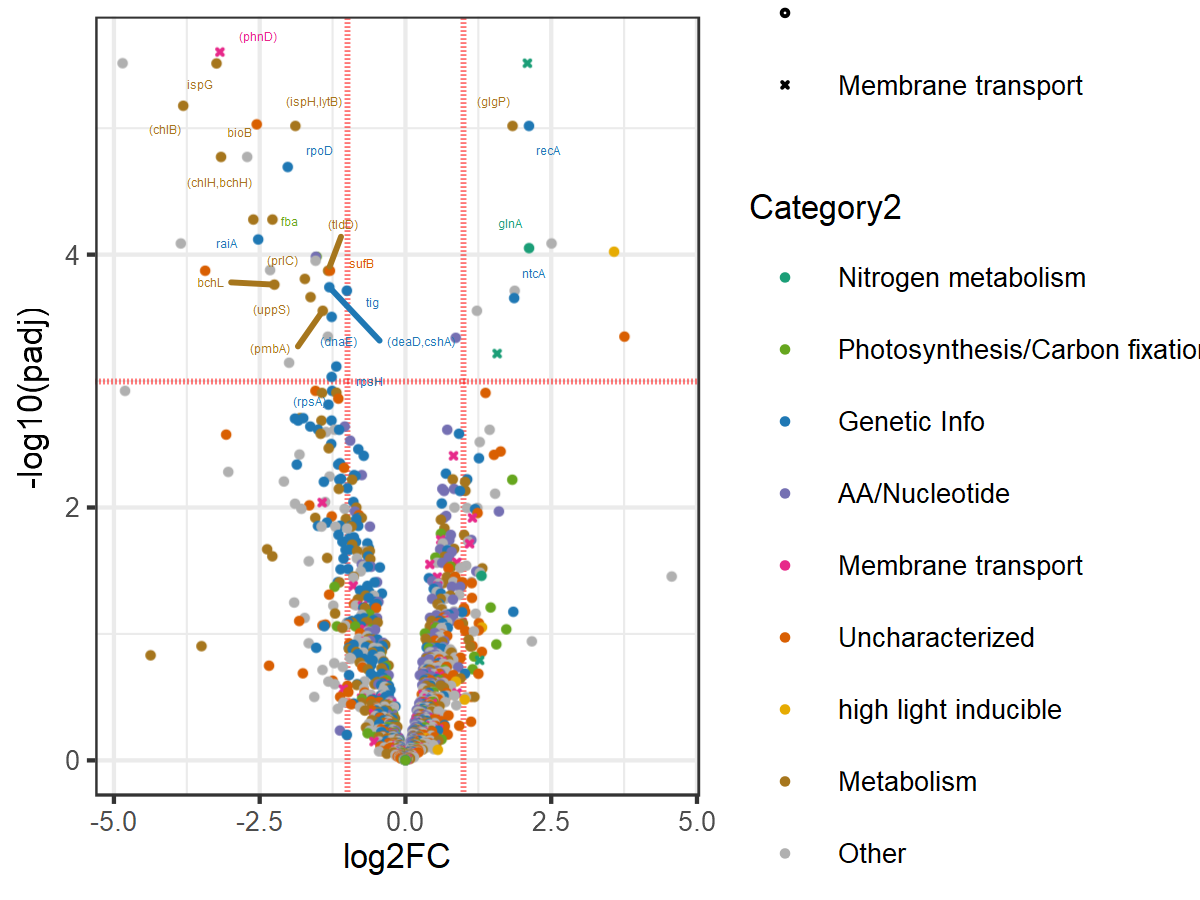

In [80]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [81]:
ggsave('figures/MED4_Axenic_DE_Proteome.svg', height = 3, width = 4)

Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


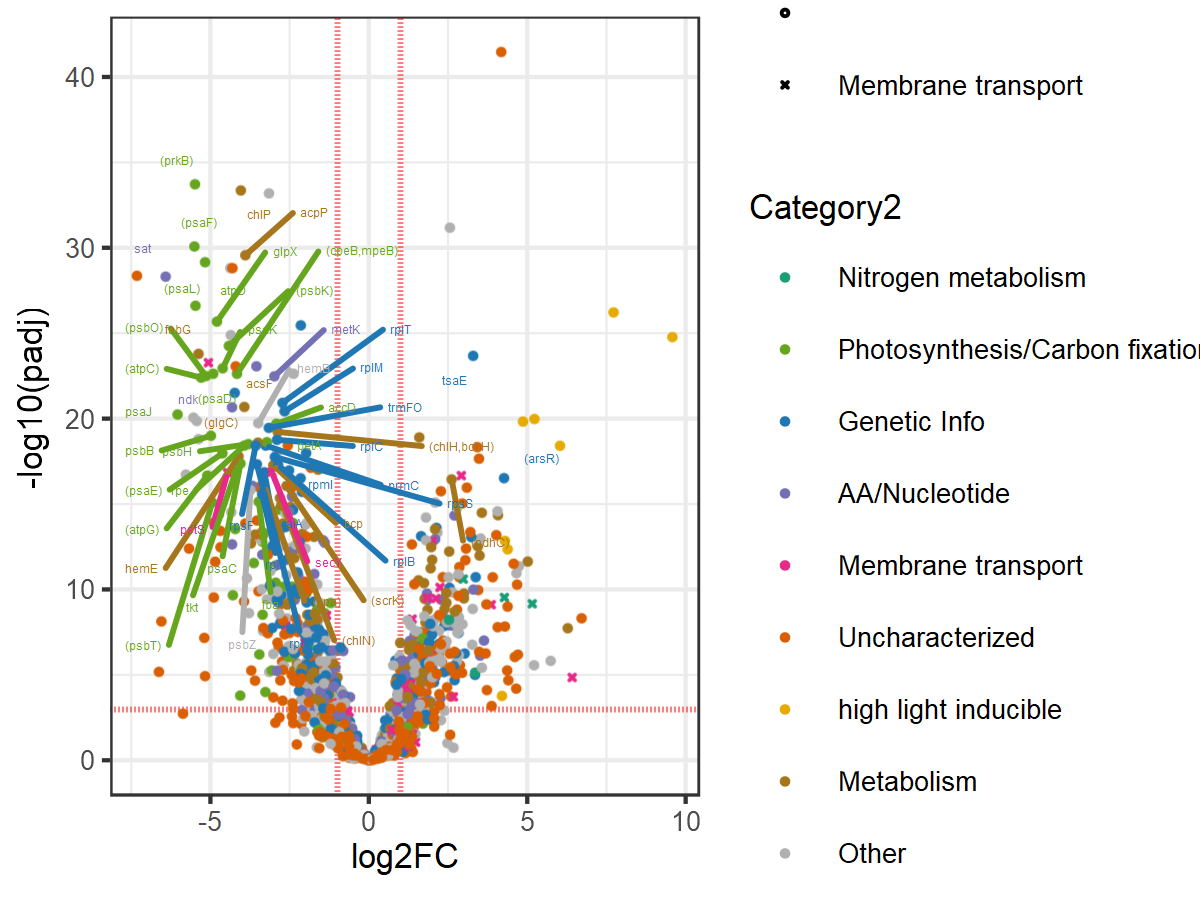

In [82]:
library(ggrepel)
assay = 'RNA'


# ymax <- 15
# df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
# xmax <- 5
# df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 2.5, log.padj > 15, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    ggrastr::geom_point_rast(size=0.3, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=1)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [83]:
ggsave('figures/MED4_Axenic_DE_RNA.svg', height = 3, width = 4)


Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


In [75]:
df_all$kegg_gene

Warning message:
"Unknown or uninitialised column: `kegg_gene`."


NULL

In [76]:
help(ggsave)

ggsave {ggplot2},R Documentation
filename,File name to create on disk.
plot,"Plot to save, defaults to last plot displayed."
device,"Device to use. Can either be a device function (e.g. png), or one of ""eps"", ""ps"", ""tex"" (pictex), ""pdf"", ""jpeg"", ""tiff"", ""png"", ""bmp"", ""svg"" or ""wmf"" (windows only)."
path,Path of the directory to save plot to: path and filename are combined to create the fully qualified file name. Defaults to the working directory.
scale,Multiplicative scaling factor.
"width, height, units","Plot size in units (""in"", ""cm"", ""mm"", or ""px""). If not supplied, uses the size of current graphics device."
dpi,"Plot resolution. Also accepts a string input: ""retina"" (320), ""print"" (300), or ""screen"" (72). Applies only to raster output types."
limitsize,"When TRUE (the default), ggsave() will not save images larger than 50x50 inches, to prevent the common error of specifying dimensions in pixels."
bg,"Background colour. If NULL, uses the plot.background fill value from the plot theme."
...,"Other arguments passed on to the graphics device function, as specified by device."
